<a href="https://colab.research.google.com/github/thisishasan/slda/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project Title: Heart Failure Clinical Records Analysis and Death Events Prediction

## Dataset

### Dataset Source
#### Heart Failure Clinical Records Dataset originally source from UC Irvine Machine Learning Repository [https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records]

### Download Dataset

In [109]:
!wget -nc 'https://raw.githubusercontent.com/thisishasan/slda/refs/heads/main/dataset.csv'

File ‘dataset.csv’ already there; not retrieving.



### Importing Libraries



In [110]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy.stats import mannwhitneyu, ttest_ind, skew, kurtosis, shapiro, kstest, anderson, chi2_contingency, shapiro, anderson, probplot
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import cross_val_score, StratifiedKFold

import warnings
warnings.filterwarnings('ignore')

### Load dataset into dataframe

In [111]:
file_path = os.path.join('dataset.csv')
df = pd.read_csv(file_path)

### Initial Analysis on the dataset



In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    int64  
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  death_event               299 non-null    int64  
dtypes: float64(2), int64(11)
memory usage: 30.5 KB


In [113]:
print("Shape of Dataset:", df.shape)

Shape of Dataset: (299, 13)


In [114]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,75,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## Preparation for Exploratory Data Analysis (EDA)

### Dropping non clinical features

In [115]:
df.drop(columns=['time', 'sex'], inplace=True)

### To be consistent with the feature description let's represent the platelets as kiloplatelets/mL

In [116]:
df.platelets = df.platelets/1000

In [117]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,smoking,death_event
0,75,0,582,0,20,1,265.00000,1.9,130,0,1
1,55,0,7861,0,38,0,263.35803,1.1,136,0,1
2,65,0,146,0,20,0,162.00000,1.3,129,1,1
3,50,1,111,0,20,0,210.00000,1.9,137,0,1
4,65,1,160,1,20,0,327.00000,2.7,116,0,1


In [118]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.836120,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263.358029,97.804237,25.1,212.5,262.0,303.5,850.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
smoking,299.0,0.321070,0.467670,0.0,0.0,0.0,1.0,1.0


### Checking missing values

In [119]:
df.isnull().sum()

,0
age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
smoking,0


> Not found any missing values in the dataset



### Checking unique values in the dataset

In [120]:
df.nunique()

,0
age,46
anaemia,2
creatinine_phosphokinase,208
diabetes,2
ejection_fraction,17
high_blood_pressure,2
platelets,176
serum_creatinine,40
serum_sodium,27
smoking,2


### Check duplicate records in the dataset

In [121]:
df.duplicated().sum()

0

### Feature Distribution

#### Numerical Variables

In [122]:
numerical_vars = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']
continuous_numerical_vars = ['platelets', 'serum_creatinine']
discrete_numerical_vars = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'serum_sodium']
df[numerical_vars].head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
0,75,582,20,265.00000,1.9,130
1,55,7861,38,263.35803,1.1,136
2,65,146,20,162.00000,1.3,129
3,50,111,20,210.00000,1.9,137
4,65,160,20,327.00000,2.7,116


#### Categorical Variables

In [123]:
categorical_vars = ['anaemia', 'diabetes', 'high_blood_pressure', 'smoking']
df[categorical_vars].head()

,anaemia,diabetes,high_blood_pressure,smoking
0,0,0,1,0
1,0,0,0,0
2,0,0,0,1
3,1,0,0,0
4,1,1,0,0


#### Target Variable

In [124]:
target_vars = ['death_event']
df[target_vars].head()

,death_event
0,1
1,1
2,1
3,1
4,1


## Exploratory Data Analysis (EDA)

### Univariate Analysis of Target Variable

In [125]:
death_event_counts = df['death_event'].value_counts()
death_event_counts

,count
death_event,
0,203
1,96


#### Target Variable (death_event) using a bar plot to check the class distribution.


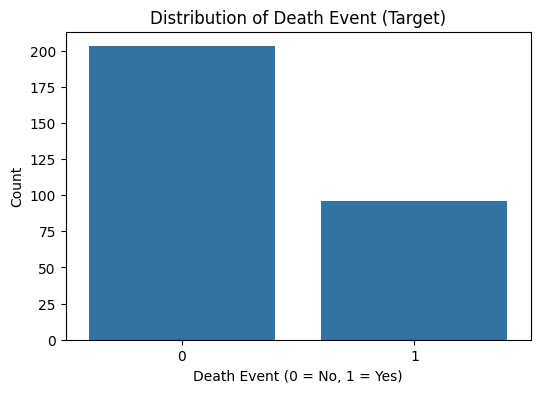

In [126]:
plt.figure(figsize=(6, 4))
sns.countplot(x='death_event', data=df)
plt.title("Distribution of Death Event (Target)")
plt.xlabel("Death Event (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

### Univariate Analysis of Numerical Variables



In [127]:
df[numerical_vars].head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
0,75,582,20,265.00000,1.9,130
1,55,7861,38,263.35803,1.1,136
2,65,146,20,162.00000,1.3,129
3,50,111,20,210.00000,1.9,137
4,65,160,20,327.00000,2.7,116


In [128]:
numerical_analysis = {}

for column in numerical_vars:
    data = df[column].dropna()
    skewness = data.skew()
    kurtois = data.kurt()
    numerical_analysis[column] = {
        "Min": np.min(data),
        "Max": np.max(data),
        "Mean": np.mean(data),
        "Median": np.median(data),
        "Mode": data.mode()[0] if not data.mode().empty else None,
        "Range": np.ptp(data),
        "Variance": np.var(data, ddof=1),
        "Standard Deviation": np.std(data, ddof=1),
        "Quantiles": np.percentile(data, [25, 50, 75]),
        "Skewness": skewness,
        "Skewness Type": "Symmetric (Normal)" if skewness == 0 else "Right-Skewed (Positive)" if skewness > 0 else "Left-Skewed (Negative)",
        "Kurtosis": kurtois,
        "Type of Kurtosis": "Leptokurtic (High)" if kurtois > 3 else "Platykurtic (Low)" if kurtois < 3 else "Mesokurtic (Normal)",
    }

numerical_analysis_df = pd.DataFrame(numerical_analysis)
display(numerical_analysis_df.T)

,Min,Max,Mean,Median,Mode,Range,Variance,Standard Deviation,Quantiles,Skewness,Skewness Type,Kurtosis,Type of Kurtosis
age,40,95,60.83612,60.0,60,55,141.486476,11.894809,"[51.0, 60.0, 70.0]",0.422496,Right-Skewed (Positive),-0.185191,Platykurtic (Low)
creatinine_phosphokinase,23,7861,581.839465,250.0,582,7838,941458.571457,970.287881,"[116.5, 250.0, 582.0]",4.46311,Right-Skewed (Positive),25.149046,Leptokurtic (High)
ejection_fraction,14,80,38.083612,38.0,35,66,140.063455,11.834841,"[30.0, 38.0, 45.0]",0.555383,Right-Skewed (Positive),0.041409,Platykurtic (Low)
platelets,25.1,850.0,263.358029,262.0,263.35803,824.9,9565.668749,97.804237,"[212.5, 262.0, 303.5]",1.462321,Right-Skewed (Positive),6.209255,Leptokurtic (High)
serum_creatinine,0.5,9.4,1.39388,1.1,1.0,8.9,1.070211,1.03451,"[0.9, 1.1, 1.4]",4.455996,Right-Skewed (Positive),25.828239,Leptokurtic (High)
serum_sodium,113,148,136.625418,137.0,136,35,19.469956,4.412477,"[134.0, 137.0, 140.0]",-1.048136,Left-Skewed (Negative),4.119712,Leptokurtic (High)


#### Numerical Variables using histograms with KDE to understand their distribution.

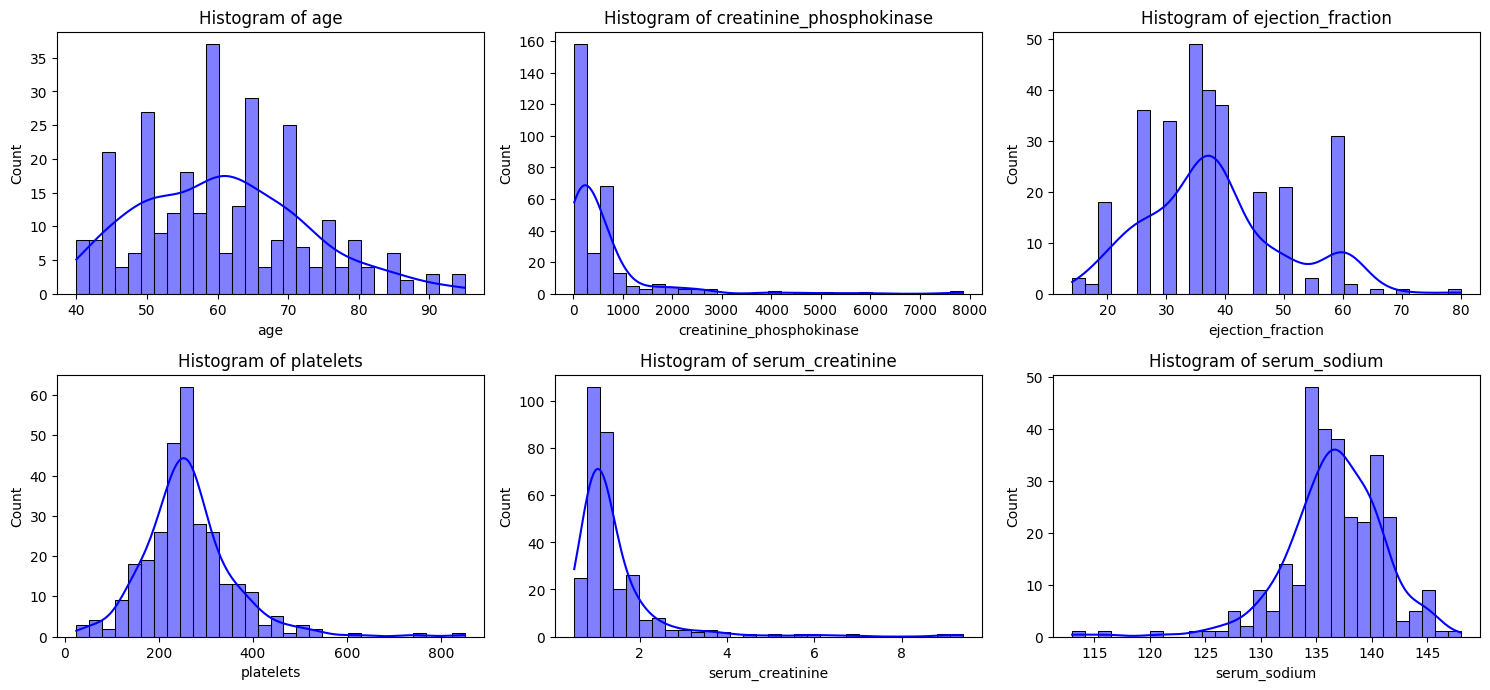

In [129]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_vars):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f"Histogram of {col}")
plt.tight_layout()
plt.show()

#### Normality Test

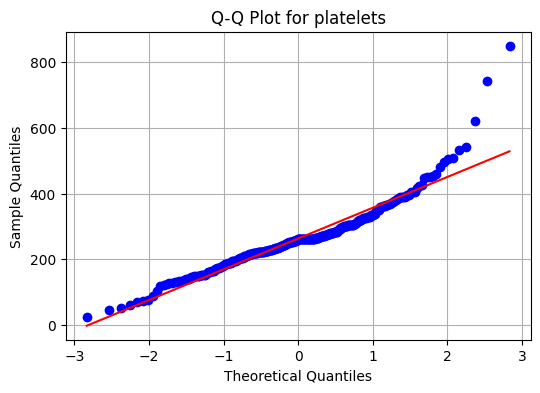

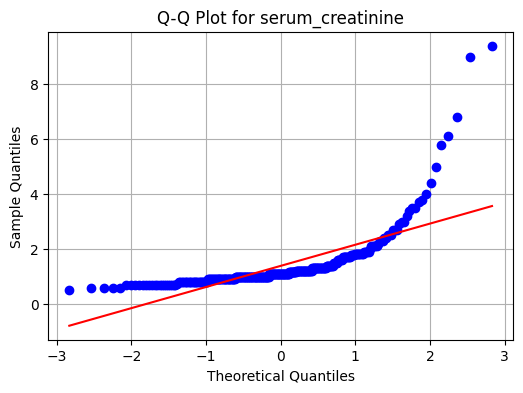

In [130]:
normality_results = {}
for var in continuous_numerical_vars:
    data = df[var].dropna()
    shapiro_stat, shapiro_p = shapiro(data) if len(data) < 5000 else (None, None)
    anderson_result = anderson(data, dist='norm')
    normality_results[var] = {
        "SW Test Statistic": shapiro_stat,
        "SW p-value": shapiro_p,
        "AD Test Statistic": anderson_result.statistic,
        "AD Critical Values": anderson_result.critical_values,
        "AD Significance Levels": anderson_result.significance_level
    }
    plt.figure(figsize=(6, 4))
    probplot(data, dist="norm", plot=plt)
    plt.title(f"Q-Q Plot for {var}")
    plt.xlabel("Theoretical Quantiles")
    plt.ylabel("Sample Quantiles")
    plt.grid(True)
    plt.show()

In [131]:
normality_df = pd.DataFrame.from_dict(normality_results, orient='index')
display(normality_df)

,SW Test Statistic,SW p-value,AD Test Statistic,AD Critical Values,AD Significance Levels
platelets,0.911509,2.883451e-12,4.989043,"[0.569, 0.648, 0.777, 0.906, 1.078]","[15.0, 10.0, 5.0, 2.5, 1.0]"
serum_creatinine,0.551466,5.392796e-27,36.450862,"[0.569, 0.648, 0.777, 0.906, 1.078]","[15.0, 10.0, 5.0, 2.5, 1.0]"


### Outlier Detection

In [132]:
outlier_info = {}
for col in numerical_vars:
    Q1, Q3 = np.percentile(df[col], [25, 75])
    IQR = Q3 - Q1
    lower_bound = max(0, Q1 - 1.5 * IQR)
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    outlier_info[col] = {
        "Lower Bound": lower_bound,
        "Upper Bound": upper_bound,
        "Outliers Count": len(outliers),
    }

outliers_df = pd.DataFrame(outlier_info)
display(outliers_df.T)

,Lower Bound,Upper Bound,Outliers Count
age,22.50,98.50,0.0
creatinine_phosphokinase,0.00,1280.25,29.0
ejection_fraction,7.50,67.50,2.0
platelets,76.00,440.00,21.0
serum_creatinine,0.15,2.15,29.0
serum_sodium,125.00,149.00,4.0


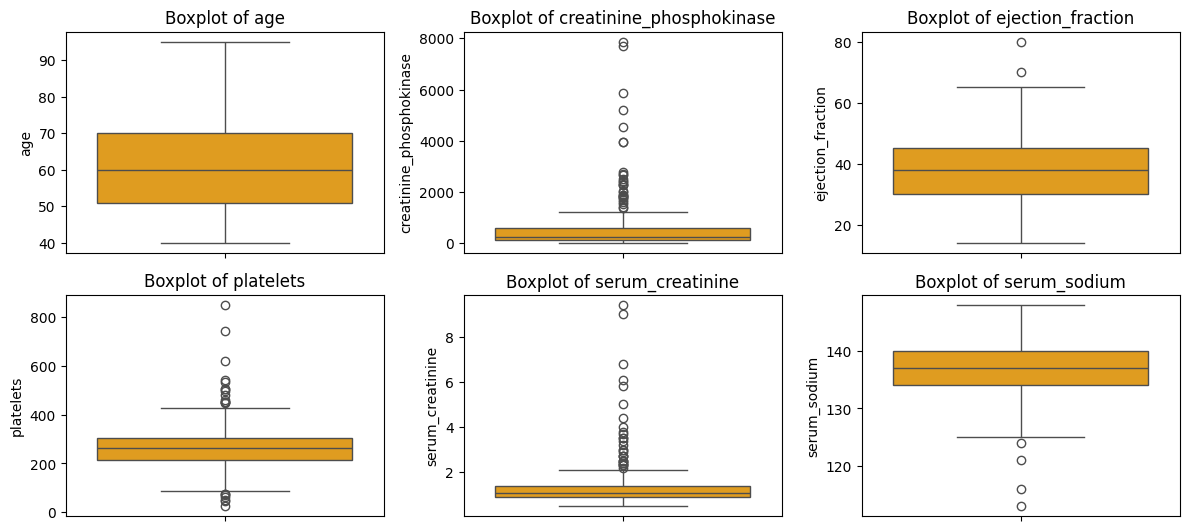

In [133]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_vars, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[column], color='orange')
    plt.title(f"Boxplot of {column}")
    plt.tight_layout()
plt.show()

### Univariate Analysis of Categorical Variables

In [134]:
categorical_analysis = {}

for column in categorical_vars:
    data = df[column]
    categorical_analysis[column] = {
        "Counts": data.value_counts().to_dict(),
        "Percentages": (data.value_counts(normalize=True) * 100).to_dict()
    }

categorical_analysis_df = pd.DataFrame(categorical_analysis)
display(categorical_analysis_df.T)

,Counts,Percentages
anaemia,"{0: 170, 1: 129}","{0: 56.85618729096989, 1: 43.1438127090301}"
diabetes,"{0: 174, 1: 125}","{0: 58.19397993311036, 1: 41.80602006688963}"
high_blood_pressure,"{0: 194, 1: 105}","{0: 64.88294314381271, 1: 35.11705685618729}"
smoking,"{0: 203, 1: 96}","{0: 67.89297658862876, 1: 32.10702341137124}"


#### Categorical Variables using bar plots to see their frequency distributions.

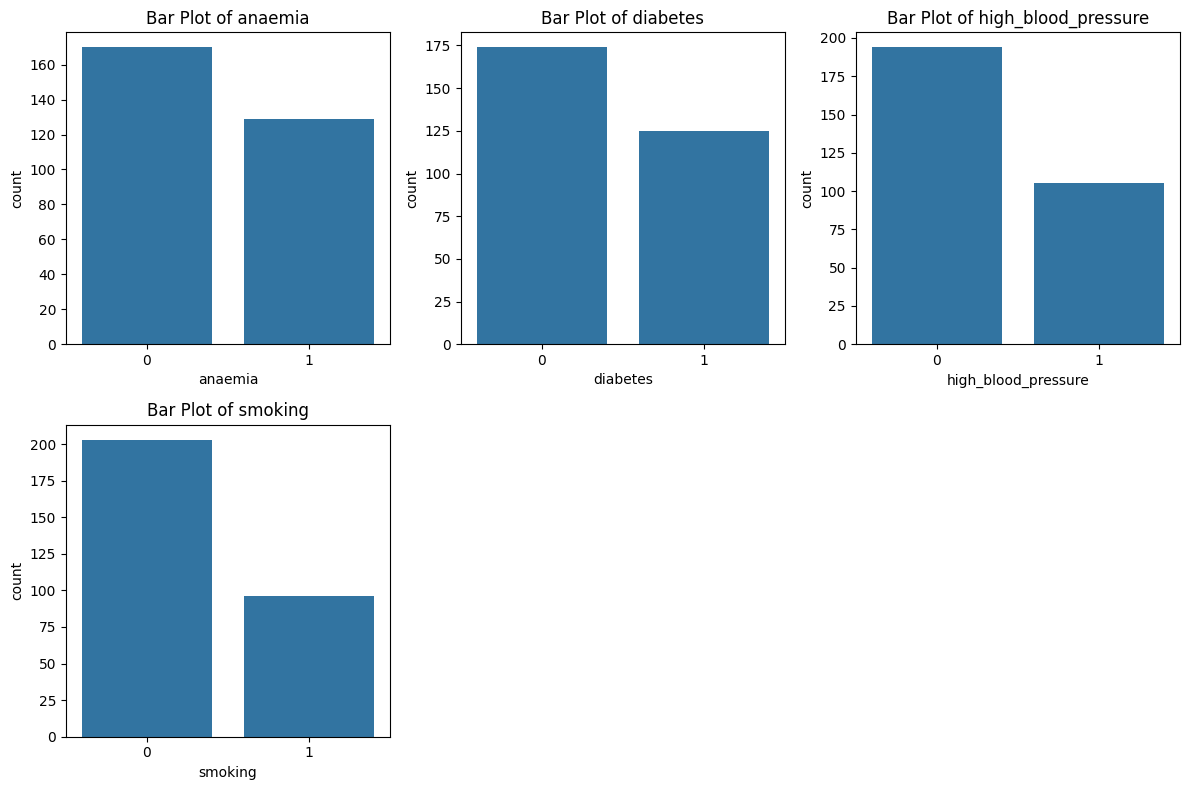

In [135]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(categorical_vars):
    plt.subplot(2, 3, i + 1)
    sns.countplot(x=df[column])
    plt.title(f"Bar Plot of {column}")
    plt.tight_layout()
plt.show()

### Bivariate Analysis of Categorical Variables vs Target Variable

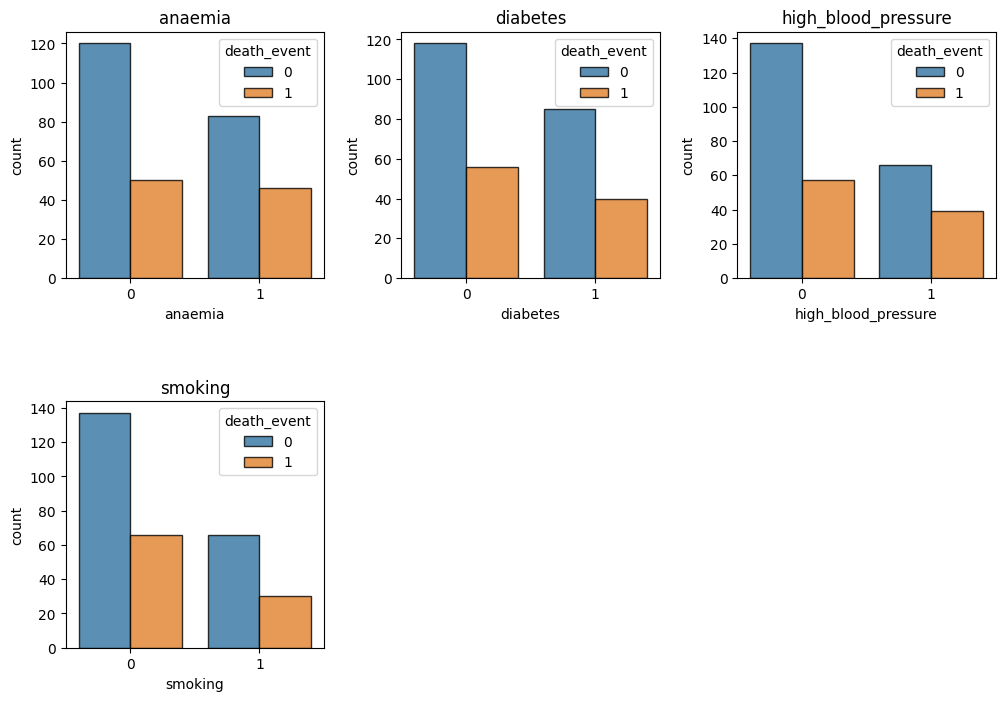

In [136]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_vars):
  plt.subplot(2, 3, i+1)
  plt.title(col)
  plt.subplots_adjust(hspace =.5, wspace=.3)
  sns.countplot(data=df, x=col, hue="death_event", alpha=0.8, edgecolor="k", linewidth=1)

#### CHI-Square Test

In [137]:
def interpret_p_value_chi_test(p_value):
    return "Significant" if p_value < 0.05 else "Not Significant"

chi_square_grouped_results = [
    [var, death_event_class, *chi2_contingency(np.hstack([
        contingency_table[death_event_class].values.reshape(-1, 1),
        (contingency_table.sum(axis=1).values.reshape(-1, 1) * contingency_table.sum(axis=0)[death_event_class] / contingency_table.sum().sum())
    ]))[:2]]
    for var in categorical_vars
    for contingency_table in [pd.crosstab(df[var], df["death_event"])]
    for death_event_class in contingency_table.columns
]

chi_square_grouped_df = pd.DataFrame(chi_square_grouped_results, columns=["Variable", "Death Event Group", "Chi-Square Statistic", "p-value"])
chi_square_grouped_df["Interpretation"] = chi_square_grouped_df["p-value"].apply(interpret_p_value_chi_test)

display(chi_square_grouped_df)


,Variable,Death Event Group,Chi-Square Statistic,p-value,Interpretation
0,anaemia,0,0.129715,0.718728,Not Significant
1,anaemia,1,0.269451,0.603700,Not Significant
2,diabetes,0,0.000000,1.000000,Not Significant
3,diabetes,1,0.000000,1.000000,Not Significant
4,high_blood_pressure,0,0.202321,0.652854,Not Significant
5,high_blood_pressure,1,0.406941,0.523526,Not Significant
6,smoking,0,0.000000,1.000000,Not Significant
7,smoking,1,0.000000,1.000000,Not Significant


### Bivariate Analysis of Numerical Variables vs Target Variable

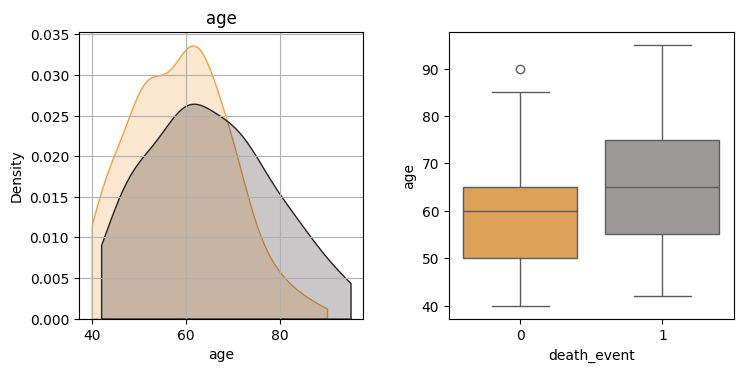

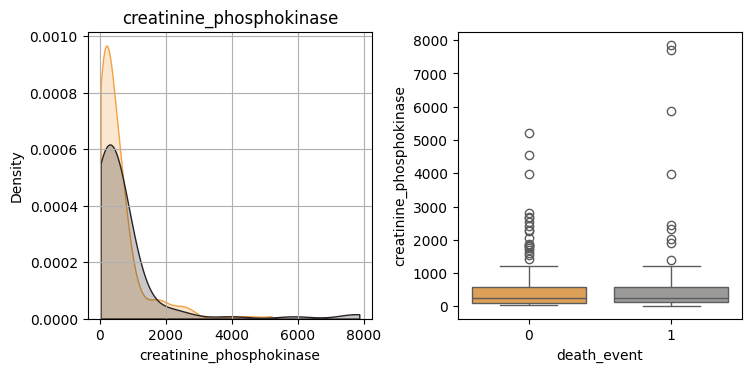

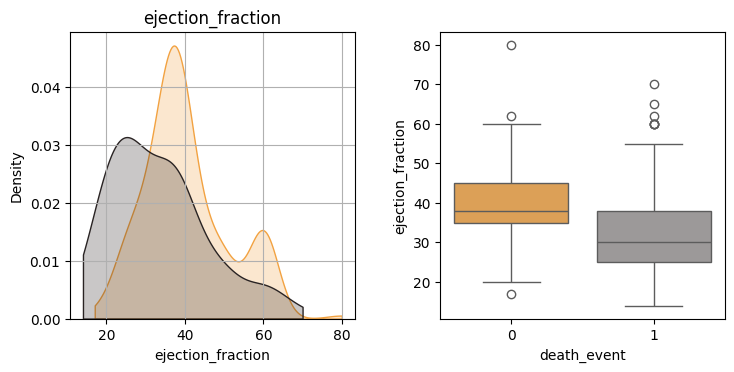

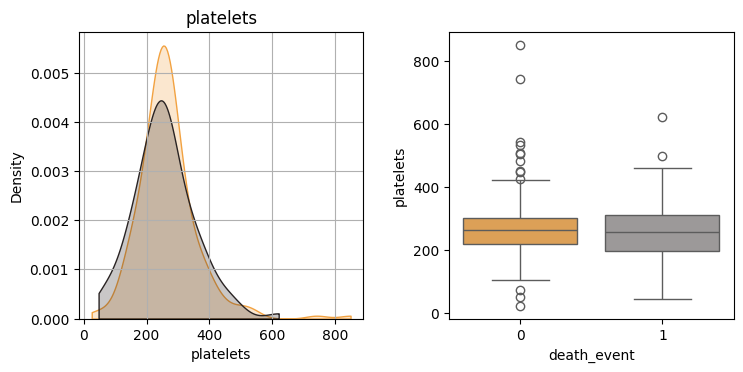

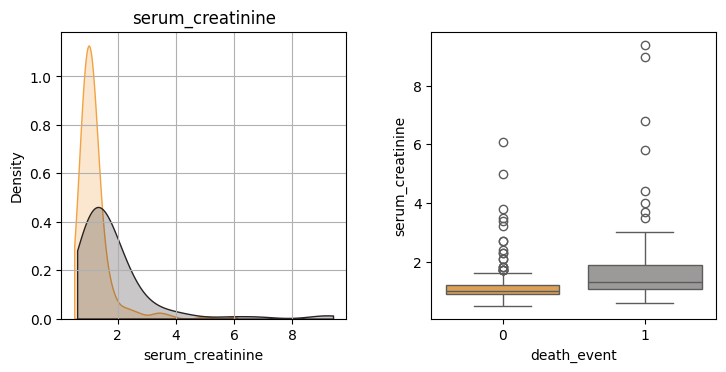

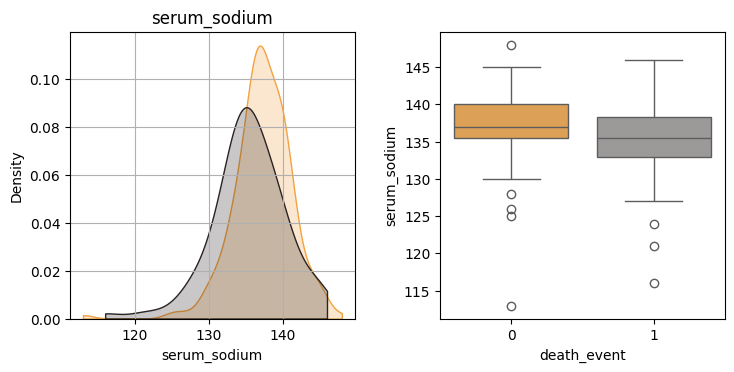

In [138]:
for i, col in enumerate(numerical_vars):
  plt.figure(figsize=(18, 27))
  plt.subplot(6, 4, i*2+1)
  plt.subplots_adjust(hspace =.25, wspace=.3)
  plt.grid(True)
  plt.title(col)
  sns.kdeplot(df.loc[df["death_event"]==0, col], label="alive", color = "#f2a241", shade=True, kernel='gau', cut=0)
  sns.kdeplot(df.loc[df["death_event"]==1, col], label="dead",  color = "#292323", shade=True, kernel='gau', cut=0)
  plt.subplot(6, 4, i*2+2)
  sns.boxplot(y = col, data = df, x="death_event", palette = ["#f2a241", "#9C9999"])

#### Conduct Mann-Whitney Test

In [139]:
def interpret_p_value_mw_test(p_value):
    return "Significant" if p_value < 0.05 else "Not Significant"

mannwhitney_test_grouped_results = []

for var in numerical_vars:
    group0 = df[df["death_event"] == 0][var]
    group1 = df[df["death_event"] == 1][var]
    u_stat_0, u_pval_0 = mannwhitneyu(group0, group1, alternative="two-sided")
    u_stat_1, u_pval_1 = mannwhitneyu(group1, group0, alternative="two-sided")
    mannwhitney_test_grouped_results.append([var, "Mann-Whitney U Test", "Death Event 0 (Survived)", u_stat_0, u_pval_0])
    mannwhitney_test_grouped_results.append([var, "Mann-Whitney U Test", "Death Event 1 (Died)", u_stat_1, u_pval_1])

mannwhitney_test_grouped_df = pd.DataFrame(mannwhitney_test_grouped_results, columns=["Variable", "Test Type", "Death Event Group", "Statistic", "p-value"])
mannwhitney_test_grouped_df["Interpretation"] = mannwhitney_test_grouped_df["p-value"].apply(interpret_p_value_mw_test)
display(mannwhitney_test_grouped_df)


,Variable,Test Type,Death Event Group,Statistic,p-value,Interpretation
0,age,Mann-Whitney U Test,Death Event 0 (Survived),7119.0,1.648395e-04,Significant
1,age,Mann-Whitney U Test,Death Event 1 (Died),12369.0,1.648395e-04,Significant
2,creatinine_phosphokinase,Mann-Whitney U Test,Death Event 0 (Survived),9460.0,6.840400e-01,Not Significant
3,creatinine_phosphokinase,Mann-Whitney U Test,Death Event 1 (Died),10028.0,6.840400e-01,Not Significant
4,ejection_fraction,Mann-Whitney U Test,Death Event 0 (Survived),13176.5,7.368249e-07,Significant
5,ejection_fraction,Mann-Whitney U Test,Death Event 1 (Died),6311.5,7.368249e-07,Significant
6,platelets,Mann-Whitney U Test,Death Event 0 (Survived),10300.5,4.255585e-01,Not Significant
7,platelets,Mann-Whitney U Test,Death Event 1 (Died),9187.5,4.255585e-01,Not Significant
8,serum_creatinine,Mann-Whitney U Test,Death Event 0 (Survived),5298.0,1.580998e-10,Significant
9,serum_creatinine,Mann-Whitney U Test,Death Event 1 (Died),14190.0,1.580998e-10,Significant


## Check Pairwise Correlation Between Numeric Variables

### Standardize numerical variables for correlation analysis (Z-score normalization)

---



In [140]:
df[numerical_vars].head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
0,75,582,20,265.00000,1.9,130
1,55,7861,38,263.35803,1.1,136
2,65,146,20,162.00000,1.3,129
3,50,111,20,210.00000,1.9,137
4,65,160,20,327.00000,2.7,116


In [141]:
df_copy_for_standardization = df.copy()

In [142]:
for i, col in enumerate(numerical_vars):
    df_copy_for_standardization[col] = StandardScaler(with_mean=True, with_std=True).fit_transform(df_copy_for_standardization[[col]])

df_copy_for_standardization.head()
df_standardized = df_copy_for_standardization[numerical_vars]
df_standardized.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
0,1.192758,0.000166,-1.530560,1.681648e-02,0.490057,-1.504036
1,-0.491467,7.514640,-0.007077,7.535660e-09,-0.284552,-0.141976
2,0.350645,-0.449939,-1.530560,-1.038073e+00,-0.090900,-1.731046
3,-0.912523,-0.486071,-1.530560,-5.464741e-01,0.490057,0.085034
4,0.350645,-0.435486,-1.530560,6.517986e-01,1.264666,-4.682176


### Compute Pairwise Correlation (Pearson correlation method)



In [143]:
correlation_matrix_pearson = df_standardized.corr(method='pearson')

### Visualize correlation matrix

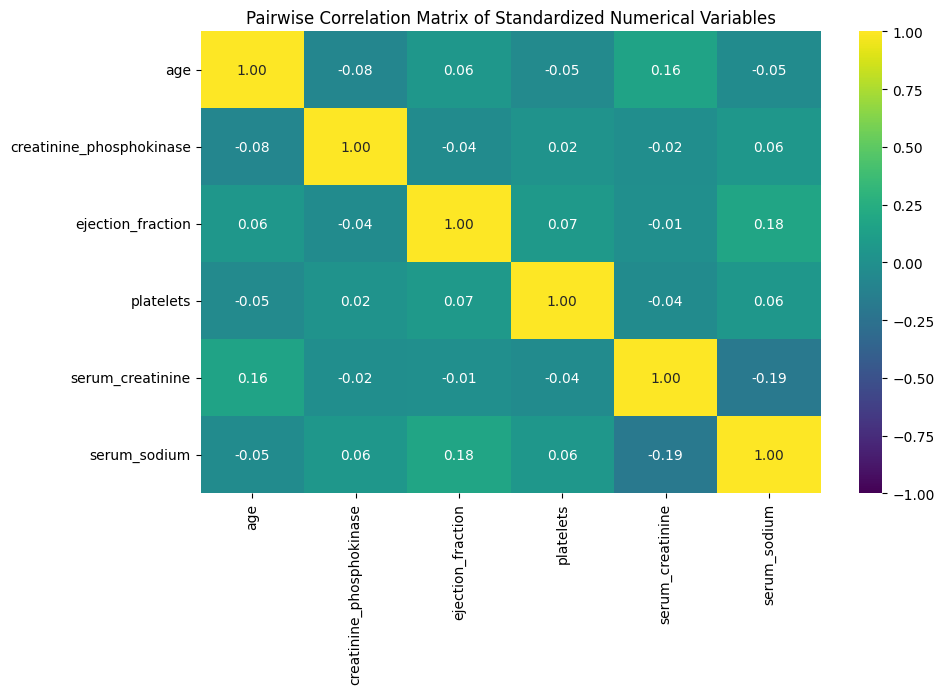

In [144]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_pearson, vmin=-1, vmax=1, cmap='viridis', annot=True, fmt='.2f')
plt.title("Pairwise Correlation Matrix of Standardized Numerical Variables")
plt.show()

## Feature Reduction

---



### Consider Numerical Variables having significant difference with Target Variable

In [145]:
numerical_vars_reduced = ['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium']

### Update the dataframe by keeping only numerical variables and target variable having significant difference

In [146]:
df_copy = df.copy()
columns_to_keep = numerical_vars_reduced + target_vars
df_copy = df_copy[columns_to_keep]
df_copy.head()

,age,ejection_fraction,serum_creatinine,serum_sodium,death_event
0,75,20,1.9,130,1
1,55,38,1.1,136,1
2,65,20,1.3,129,1
3,50,20,1.9,137,1
4,65,20,2.7,116,1


### Applying Log Transformation to serum_creatinine for all scaling methods

In [147]:
df_copy.head()

,age,ejection_fraction,serum_creatinine,serum_sodium,death_event
0,75,20,1.9,130,1
1,55,38,1.1,136,1
2,65,20,1.3,129,1
3,50,20,1.9,137,1
4,65,20,2.7,116,1


In [148]:
df_copy_2 = df_copy.copy()
df_copy_2['serum_creatinine'] = np.log1p(df_copy['serum_creatinine'])
df_copy_2.head()

,age,ejection_fraction,serum_creatinine,serum_sodium,death_event
0,75,20,1.064711,130,1
1,55,38,0.741937,136,1
2,65,20,0.832909,129,1
3,50,20,1.064711,137,1
4,65,20,1.308333,116,1


In [149]:
df_copy['serum_creatinine'].skew()

4.455995882049026

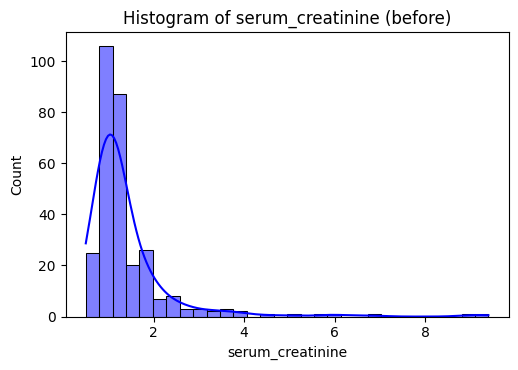

In [150]:
plt.figure(figsize=(15, 10))
plt.subplot(3, 3, i + 1)
sns.histplot(df_copy['serum_creatinine'], kde=True, bins=30, color='blue')
plt.title(f"Histogram of serum_creatinine (before)")
plt.tight_layout()
plt.show()

In [151]:
df_copy_2['serum_creatinine'].skew()

2.313206697286668

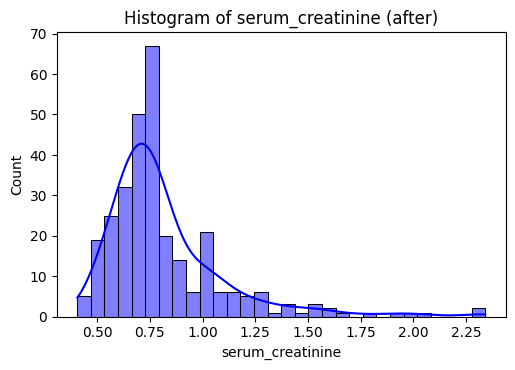

In [152]:
plt.figure(figsize=(15, 10))
plt.subplot(3, 3, i + 1)
sns.histplot(df_copy_2['serum_creatinine'], kde=True, bins=30, color='blue')
plt.title(f"Histogram of serum_creatinine (after)")
plt.tight_layout()
plt.show()

## Standardization (Numerical Variables)

In [153]:
df_copy_3 = df_copy_2.copy()
for i, col in enumerate(numerical_vars_reduced):
    df_copy_3[col] = StandardScaler(with_mean=True, with_std=True).fit_transform(df_copy_3[[col]])

df_copy_3.head()

,age,ejection_fraction,serum_creatinine,serum_sodium,death_event
0,1.192758,-1.530560,0.854201,-1.504036,1
1,-0.491467,-0.007077,-0.277325,-0.141976,1
2,0.350645,-1.530560,0.041589,-1.731046,1
3,-0.912523,-1.530560,0.854201,0.085034,1
4,0.350645,-1.530560,1.708251,-4.682176,1


## Model Building - Supervised Learning Approach (Logistic Regression and Decision Tree Classifier)


#### Split features & target variable

In [154]:
X = df_copy_3.drop(columns=['death_event'])
y = df_copy_3['death_event']

#### Split dataset into Train & Test (80-20 split)

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#### Handle Class Imbalance (Class Weight Adjustment)

In [156]:
class_weights = compute_class_weight('balanced', classes=np.array([0, 1]), y=y_train)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}
print(class_weight_dict)

{0: 0.7376543209876543, 1: 1.551948051948052}


#### Cross-Validation (Stratified k-Fold, k = 5)

In [157]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

models_for_cv = {
    "Logistic Regression": LogisticRegression(class_weight=class_weight_dict, random_state=42),
    "Decision Tree Classifier": DecisionTreeClassifier(class_weight=class_weight_dict, random_state=42),
    "Random Forest Classifier": RandomForestClassifier(class_weight=class_weight_dict, random_state=42)
}

cv_results = {}
for model_name, model in models_for_cv.items():
    scores = cross_val_score(model, X_train, y_train, cv=skf, scoring='f1')
    cv_results[model_name] = scores.mean()

cv_df = pd.DataFrame.from_dict(cv_results, orient='index', columns=["Mean F1 Score"])
display(cv_df)


,Mean F1 Score
Logistic Regression,0.629483
Decision Tree Classifier,0.426601
Random Forest Classifier,0.542715


#### Initialize Models (Logistic Regression and Decision Tree Classifier)

In [158]:
log_model = LogisticRegression(random_state=42, class_weight=class_weight_dict)
tree_model = DecisionTreeClassifier(random_state=42, max_depth=4, class_weight=class_weight_dict)
rf_model = RandomForestClassifier(class_weight=class_weight_dict, random_state=42)

#### Train Models

In [159]:
log_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.7376543209876543,
                                     1: 1.551948051948052},
                       random_state=42)

### Final Model Selection (Logistic Regression, Random Forest Classifier)

#### Testing Models

In [160]:
y_pred_log = log_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

#### Compute Probabilities

In [161]:
y_prob_log = log_model.predict_proba(X_test)[:, 1]
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

#### Evaluate Models performances by calculating metrics (Precision, Recall, F1 Score and ROC-AUC)

In [162]:
def evaluate_models(models, y_true, y_preds):
    performances = {}
    for model_name, y_pred in zip(models.keys(), y_preds):
        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)
        roc_auc = roc_auc_score(y_true, y_pred)

        performances[model_name] = {
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1,
            "ROC-AUC": roc_auc
        }

    performances_df = pd.DataFrame(performances).T
    return performances_df

models = {
    "Logistic Regression": y_pred_log,
    "Random Forest": y_pred_rf
}

performance_df = evaluate_models(models, y_test, [y_pred_log, y_pred_rf])
display(performance_df)

,Precision,Recall,F1 Score,ROC-AUC
Logistic Regression,0.538462,0.736842,0.622222,0.722080
Random Forest,0.571429,0.421053,0.484848,0.637356


#### Visualization of Performances comparision between Logistic Regression and Decision Tree Classifier

<Figure size 800x500 with 0 Axes>

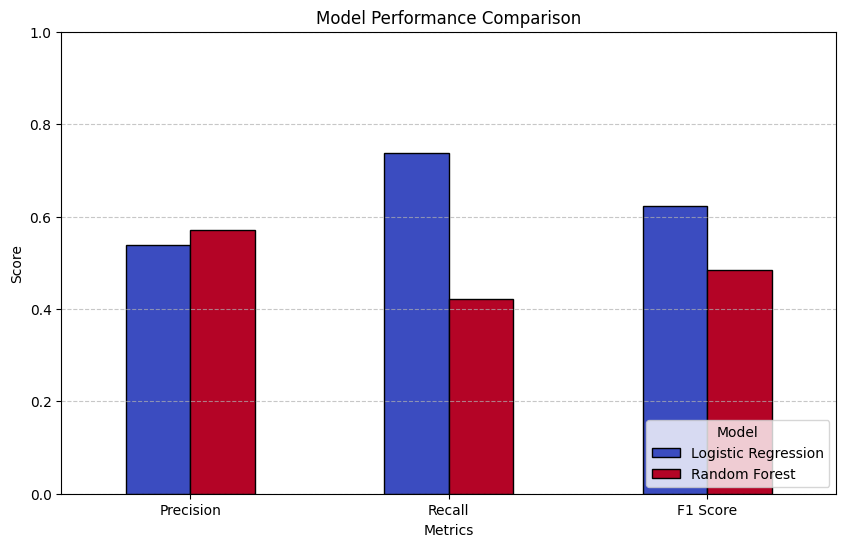

In [163]:
model_names = ["Logistic Regression", "Random Forest"]
metrics_labels = ["Precision", "Recall", "F1 Score"]
performance_data = performance_df
df_performance = pd.DataFrame(performance_data, index=model_names, columns=metrics_labels)

plt.figure(figsize=(8, 5))
df_performance.T.plot(kind="bar", figsize=(10, 6), colormap="coolwarm", edgecolor="black")
plt.title("Model Performance Comparison")
plt.xlabel("Metrics")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.legend(title="Model", loc="lower right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

#### Confusion Matrix

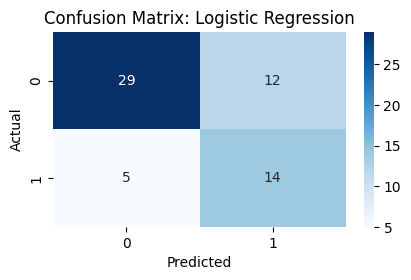

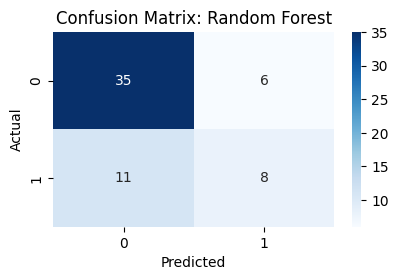

In [164]:
def plot_confusion_matrix(y_true, y_pred, model_name, position):
    plt.figure(figsize=(12, 5))
    plt.subplot(2, 3, position)
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1"], yticklabels=["0", "1"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix: {model_name}")
    plt.tight_layout()
    plt.show()

plot_confusion_matrix(y_test, y_pred_log, "Logistic Regression", 1)
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest", 2)